In [1]:
# We must install the required package:

!pip install python-crfsuite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.6 MB/s eta 0:00:00


In [2]:
import nltk
import time
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [3]:
# We define the test subset:

test = nltk.corpus.treebank.tagged_sents()[3000:]

# Using HMM with LID smoothing

In [4]:
results={}
results["HMM"] = {}

for i in range(500, 3001, 500):
  start_time = time.time()
  train = nltk.corpus.treebank.tagged_sents()[:i]
  model = nltk.HiddenMarkovModelTagger.train(train)
  train_time = time.time()
  accuracy = model.accuracy(test)
  end_time = time.time()
  results["HMM"][i] = (accuracy, train_time-start_time, end_time-train_time)


# TnT, Perceptron and CRFTagger

In [5]:
models={'Tnt':nltk.tag.tnt.TnT() ,'Perceptron': nltk.tag.perceptron.PerceptronTagger(load=False) ,'CRFTagger':nltk.tag.CRFTagger()}

for name, model in models.items():
  results[name]= {}
  for i in range(500, 3001, 500):
    start_time = time.time()
    train = nltk.corpus.treebank.tagged_sents()[:i]
    if name=='CRFTagger':
      model.train(train,'crf_tagger-model')
    else:
      model.train(train)
    train_time = time.time()
    accuracy = model.accuracy(test)
    end_time = time.time()
    results[name][i] = (accuracy, train_time-start_time, end_time-train_time)

# Graph of the results

In [6]:
import matplotlib.pyplot as plt

#Plotter Function:
def plotter(models):
    # Creating the subplots
    plt.figure(figsize=(15, 6))

    # First subplot for Accuracy
    plt.subplot(1, 3, 1)
    for model_name, model_data in models.items():
        x_values = list(model_data.keys())
        y_values_1 = [v[0] for v in model_data.values()]
        plt.plot(x_values, y_values_1, marker='o', label=model_name)  # Plot for each model
    plt.title('Accuracy')
    plt.xlabel('Number of Sentences')
    plt.ylabel('Accuracy')
    plt.legend()  # Add legend for model names

    # Second subplot for Training Time
    plt.subplot(1, 3, 2)
    for model_name, model_data in models.items():
        x_values = list(model_data.keys())
        y_values_2 = [v[1] for v in model_data.values()]
        plt.plot(x_values, y_values_2, marker='o', label=model_name)  # Plot for each model
    plt.title('Training Time')
    plt.xlabel('Number of Sentences')
    plt.ylabel('Training Time (s)')
    plt.legend()

    # Third subplot for Testing Time
    plt.subplot(1, 3, 3)
    for model_name, model_data in models.items():
        x_values = list(model_data.keys())
        y_values_3 = [v[2] for v in model_data.values()]
        plt.plot(x_values, y_values_3, marker='o', label=model_name)  # Plot for each model
    plt.title('Testing Time')
    plt.xlabel('Number of Sentences')
    plt.ylabel('Testing Time (s)')
    plt.legend()

    # Displaying the plots
    plt.tight_layout()
    plt.show()

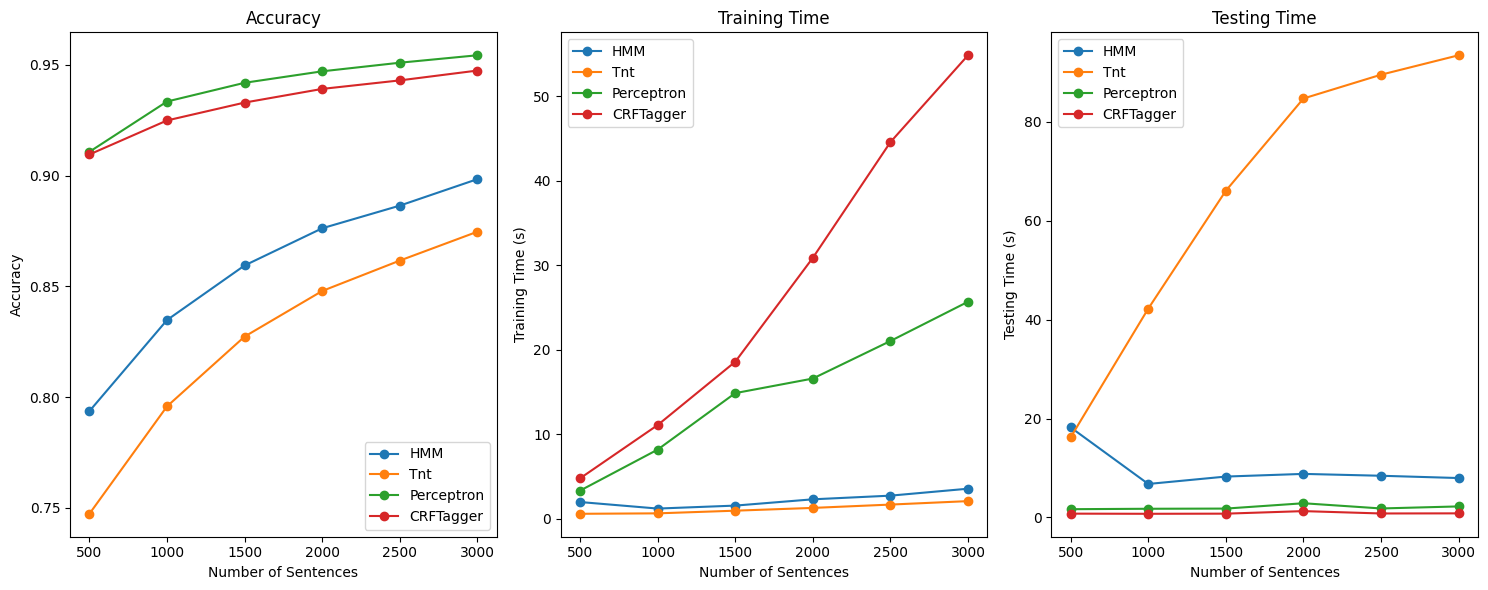

In [7]:
plotter(results)

# Conclusion

We suspect, that the TnT does some kind of lazy learning, because training time is super low, but the testing time is huge compared to the others.

When choosing a model from these for some tasks, we would consider the following aspects:


*   If we don't care about computational time, then the perceptron is the best choice, since it is the most accurate.
*   If we have little time for training, the best alternative is the HMM, as that is the most accurate among those taking less time to train than the perceptron.
*   If the training time does not matter a lot, but we need to evaluate the model for lots of sentences, the best option is the perceptron, as it is fast to evaluate.

The perceptron dominates the CFRTagger in accuracy and in training time as well, while performing similar when testing (from this experiment, it seems that their ratio is O(1), constant).

Also, the HMM dominates the TnT in accuracy and also when evaluating the model, while they perform similar during training.

In conclusion, we would only use the HMM, if training time is a huge bottleneck - in other cases, we would stick with the perceptron.





